In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
import tensorflow as tf
from keras.metrics import MeanAbsoluteError
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Data Pre-Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/DLPS_Data/1-s2.0-S0264127518308682-mmc1.csv")
dataset


,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [ ]:
#input
x = dataset.iloc[:,1:22].values
#targeted output
y = dataset.iloc[:,22].values
y.shape
x_original = x
y_original = y

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))

# Normalize the data
x = scaler.fit_transform(x)

scaler = MinMaxScaler(feature_range=(-0.99, 0.99))
y = y.reshape(-1,1)

y = scaler.fit_transform(y)

In [ ]:
# X_ = MinMaxScaler(feature_range=(-0.5, 0.5))
# Y_ = MinMaxScaler(feature_range=(-0.99, 0.99))
# y = y.reshape(-1,1)
# x[:,:] = X_.fit_transform(x[:,:])
# y = Y_.fit_transform(y)
# y.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42)
x_test.size

3423

In [ ]:
# Model

# Shallow Network


## Original Dataset

### ReLU Activation

In [ ]:
import tensorflow as tf

# Define the model
model_sh_relu = tf.keras.Sequential([
  tf.keras.layers.Dense(21, activation='ReLU'),
  tf.keras.layers.Dense(21, activation='ReLU'),
  tf.keras.layers.Dense(1)
])


In [ ]:
# Compile the model
#optimizer = tf.keras.optimizers.Adam(lr=0.01)
model_sh_relu.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error','mean_absolute_percentage_error'])

history_sh_relu = model_sh_relu.fit(x_train, y_train, epochs=1000,batch_size=32)

Epoch 1/1000
11/11 [==============================] - 1s 3ms/step - loss: 0.3336 - mean_absolute_error: 0.5089 - mean_absolute_percentage_error: 130.1858
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1955 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 159.0857
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1696 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 193.6472
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1598 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 194.9530
Epoch 5/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1423 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 176.9031
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1338 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 158.3295
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
loss_sh_relu,mean_sh_relu, error_sh_relu = model_sh_relu.evaluate(x_test, y_test)

print('Test accuracy:',100 - error_sh_relu)

6/6 [==============================] - 0s 3ms/step - loss: 0.0814 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 52.6522
Test accuracy: 47.34777069091797


### Tanh Activation

In [ ]:


# Define the model
model_sh_tanh = tf.keras.Sequential([
  tf.keras.layers.Dense(21, activation='tanh'),
  tf.keras.layers.Dense(21, activation='tanh'),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_sh_tanh.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error','mean_absolute_percentage_error'])
history_sh_tanh = model_sh_tanh.fit(x_train, y_train, epochs=1000,batch_size=32)


Epoch 1/1000
11/11 [==============================] - 1s 2ms/step - loss: 0.3558 - mean_absolute_error: 0.4472 - mean_absolute_percentage_error: 294.1889
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1806 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 161.0424
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1671 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 158.5265
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1486 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 170.9539
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1406 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 170.7581
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1290 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 149.1369
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:

loss_sh_tanh,mean_sh_tanh, error_sh_tanh = model_sh_tanh.evaluate(x_test, y_test)

print('Test accuracy:',100 - error_sh_tanh)

6/6 [==============================] - 0s 3ms/step - loss: 0.0760 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 45.3257
Test accuracy: 54.67433547973633


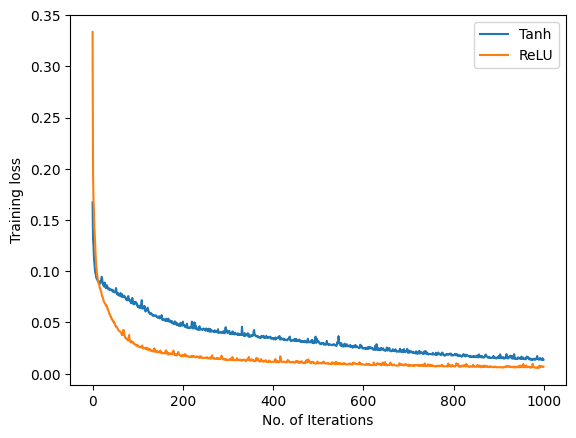

In [ ]:
# plotting the training loss of the neural network model over the course of its training.

plt.plot(history_sh_tanh.history['loss'],label= 'Tanh')
plt.plot(history_sh_relu.history['loss'],label= 'ReLU')
plt.xlabel("No. of Iterations")
plt.ylabel("Training loss")
plt.legend()

Text(0, 0.5, 'y_pred')

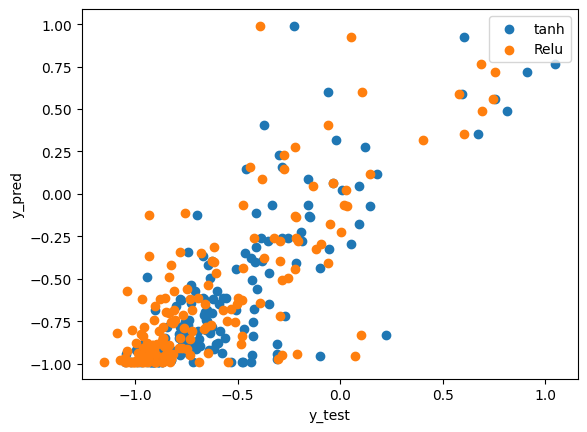

In [ ]:
y_pred_sh_relu=model_sh_relu(x_test)
y_pred_sh_tanh=model_sh_tanh(x_test)
plt.scatter(y_pred_sh_tanh,y_test)
plt.scatter(y_pred_sh_relu,y_test)
plt.legend(["tanh","Relu"])
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
Sy_test.shape

(163, 1)

In [ ]:
covariance_sh_relu = np.corrcoef(np.array(y_pred_sh_relu).flatten(), np.array(y_test).flatten())[0, 1]
covariance_sh_tanh = np.corrcoef(np.array(y_pred_sh_tanh).flatten(), np.array(y_test).flatten())[0, 1]
print("Covariance of ReLU: ",covariance_sh_relu,"\nCovariance of tanh: ",covariance_sh_tanh)

Covariance of ReLU:  0.7907853644372984 
Covariance of tanh:  0.8104911546114203


## PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components= 15)
x_red = pca.fit_transform(x_original)

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))

# Normalize the data
x_red = scaler.fit_transform(x_red)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_red, y, test_size=1/3, random_state=42)

In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(40, activation='tanh'),
  tf.keras.layers.Dense(40, activation='tanh'),
  tf.keras.layers.Dense(1)
])


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error','mean_absolute_percentage_error'])

history = model.fit(x_train, y_train, epochs=1000,batch_size=32)

Epoch 1/1000
11/11 [==============================] - 1s 5ms/step - loss: 0.4108 - mean_absolute_error: 0.5632 - mean_absolute_percentage_error: 135.6656
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1717 - mean_absolute_error: 0.3240 - mean_absolute_percentage_error: 187.3787
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1443 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 192.7103
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1183 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 150.5123
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1093 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 142.1128
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1024 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 141.5465
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
loss,mean, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy:',100 - accuracy)

6/6 [==============================] - 2s 5ms/step - loss: 0.1007 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 51.2237
Test accuracy: 48.776336669921875


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components= 10)
x_red = pca.fit_transform(x_original)

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))

# Normalize the data
x_red = scaler.fit_transform(x_red)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_red, y, test_size=1/3, random_state=42)

In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(40, activation='tanh'),
  tf.keras.layers.Dense(40, activation='ReLU'),
  tf.keras.layers.Dense(1)
])


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error','mean_absolute_percentage_error'])

history = model.fit(x_train, y_train, epochs=1000,batch_size=32)

Epoch 1/1000
11/11 [==============================] - 1s 2ms/step - loss: 0.4562 - mean_absolute_error: 0.6079 - mean_absolute_percentage_error: 98.2014
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2807 - mean_absolute_error: 0.4678 - mean_absolute_percentage_error: 112.5594
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1767 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 143.0818
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1396 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 167.3220
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1279 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 166.3805
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1165 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 155.4310
Epoch 7/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1

In [ ]:
loss,mean, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy:',100 - accuracy)

6/6 [==============================] - 0s 3ms/step - loss: 0.0872 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 53.6337
Test accuracy: 46.366302490234375


# Deep Neural Network

## Data Pre-Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/DLPS_Data/1-s2.0-S0264127518308682-mmc1.csv")
dataset

Mounted at /content/drive


,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [ ]:
#input
x = dataset.iloc[:,1:22].values
#targeted output
y = dataset.iloc[:,22].values
x_original = x
y.shape

(487,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))

# Normalize the data
x = scaler.fit_transform(x)

scaler = MinMaxScaler(feature_range=(-0.99, 0.99))
y = y.reshape(-1,1)

y = scaler.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42)
x_test.size

3423

## DNN

Epoch 1/1000
11/11 [==============================] - 2s 4ms/step - loss: 0.2360 - mean_absolute_error: 0.4177 - mean_absolute_percentage_error: 149.1137
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1422 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 180.7341
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1261 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 155.6143
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1165 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 146.9353
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1076 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 144.7706
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1009 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 129.8855
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.

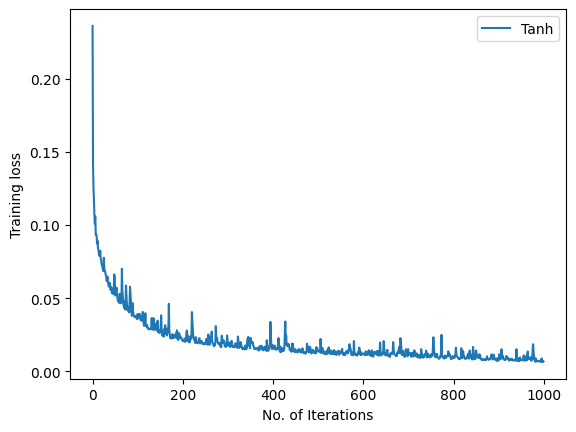

In [ ]:
model_dnn_tanh = tf.keras.Sequential([
  tf.keras.layers.Dense(21, activation='tanh'),
  tf.keras.layers.Dense(21, activation='tanh'),
  tf.keras.layers.Dense(21, activation='tanh'),
  tf.keras.layers.Dense(15, activation='tanh'),
  tf.keras.layers.Dense(10, activation='tanh'),
  tf.keras.layers.Dense(5, activation='tanh'),
  tf.keras.layers.Dense(3, activation='tanh'),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_dnn_tanh.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error','mean_absolute_percentage_error'])
history_dnn_tanh = model_dnn_tanh.fit(x_train, y_train, epochs=1000,batch_size=32)
plt.plot(history_dnn_tanh.history['loss'],label= 'Tanh')

plt.xlabel("No. of Iterations")
plt.ylabel("Training loss")
plt.legend()

In [ ]:
loss, mean_err, mean_perc = model_dnn_tanh.evaluate(x_test, y_test)
print('Test accuracy:', 100 - mean_perc)

loss, mean_err, mean_perc = model_dnn_tanh.evaluate(x_train, y_train)
print('Train accuracy:', 100 - mean_perc)

6/6 [==============================] - 0s 3ms/step - loss: 0.1078 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 60.6241
Test accuracy: 39.37586212158203
11/11 [==============================] - 0s 2ms/step - loss: 0.0071 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 23.3654
Train accuracy: 76.63457489013672


## Stacked Auto Encoder on DNN Implementation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the number of layers and nodes in each layer
n_layers = 7
n_nodes = [21, 21,21,21,15,10, 5, 3, 1]

# Define the activation function
activation = 'tanh'

# Create the stacked autoencoder model
model = Sequential()

# Add the encoder layers
for i in range(n_layers):
    # Add a dense layer with the specified number of nodes and activation function
    model.add(Dense(units=n_nodes[i+1], activation=activation, input_dim=n_nodes[i]))
    
# Add the decoder layers in reverse order
for i in range(n_layers-1, -1, -1):
    # Add a dense layer with the specified number of nodes and activation function
    model.add(Dense(units=n_nodes[i], activation=activation))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam',metrics = ['mean_absolute_percentage_error'])
# Train the stacked autoencoder on the input data
model.fit(x_train, x_train, epochs=100, batch_size=32)



Epoch 1/100
11/11 [==============================] - 2s 3ms/step - loss: 0.1293 - mean_absolute_percentage_error: 261433.8281
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0849 - mean_absolute_percentage_error: 529727.1250
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0653 - mean_absolute_percentage_error: 549995.8750
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0549 - mean_absolute_percentage_error: 326907.7812
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0485 - mean_absolute_percentage_error: 284836.0312
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0441 - mean_absolute_percentage_error: 523441.9688
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0416 - mean_absolute_percentage_error: 571516.9375
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0403 - mean_absolute_percentage_error: 5503

Epoch 1/1000
9/9 [==============================] - 3s 34ms/step - loss: 0.5544 - mean_absolute_percentage_error: 107.9810 - val_loss: 0.5394 - val_mean_absolute_percentage_error: 108.9269
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.5290 - mean_absolute_percentage_error: 103.8506 - val_loss: 0.5171 - val_mean_absolute_percentage_error: 106.6018
Epoch 3/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.5037 - mean_absolute_percentage_error: 102.4509 - val_loss: 0.4919 - val_mean_absolute_percentage_error: 110.2109
Epoch 4/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.4700 - mean_absolute_percentage_error: 102.3949 - val_loss: 0.4484 - val_mean_absolute_percentage_error: 117.7116
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.4041 - mean_absolute_percentage_error: 103.2979 - val_loss: 0.3684 - val_mean_absolute_percentage_error: 144.5527
Epoch 6/1000
9/9 [==============================] - 0s 9ms/

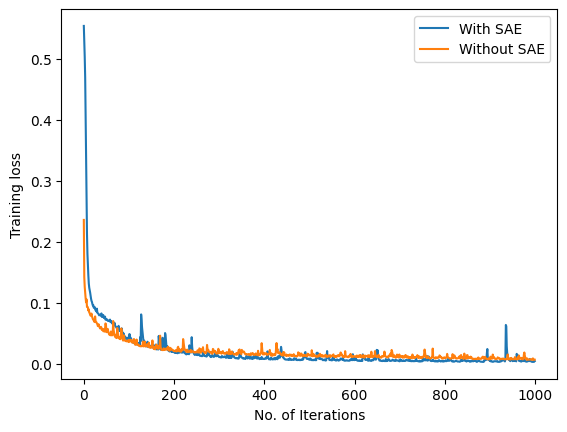

In [ ]:
autoencoder_weights = model.get_weights()[:-2]
nn_model = Sequential()

activation = 'LeakyReLU'

# Add the layers to the deep neural network
for i in range(len(autoencoder_weights)//2):
    nn_model.add(Dense(units=autoencoder_weights[2*i+1].shape[0], activation=activation, input_dim=autoencoder_weights[2*i].shape[0]))
    nn_model.layers[-1].set_weights(autoencoder_weights[2*i:2*i+2])

# Compile the deep neural network with mean squared error loss and Adam optimizer
nn_model.compile(loss='mse', optimizer='adam', metrics = ['mean_absolute_percentage_error'])
history = nn_model.fit(x_train, y_train, epochs=1000, validation_split=0.2)
plt.plot(history.history['loss'],label= 'With SAE')
plt.plot(history_dnn_tanh.history['loss'],label= 'Without SAE')
plt.xlabel("No. of Iterations")
plt.ylabel("Training loss")
plt.legend()




In [ ]:
loss, accuracy = nn_model.evaluate(x_test, y_test)

print('Test accuracy:', 100 - accuracy)

loss, accuracy = nn_model.evaluate(x_train, y_train)

print('Train accuracy:', 100 - accuracy)

6/6 [==============================] - 0s 4ms/step - loss: 0.0773 - mean_absolute_percentage_error: 55.3298
Test accuracy: 44.67018508911133
11/11 [==============================] - 0s 3ms/step - loss: 0.0139 - mean_absolute_percentage_error: 37.4703
Train accuracy: 62.529666900634766


## SAE with Regularisation

Epoch 1/1000
9/9 [==============================] - 3s 58ms/step - loss: 0.5749 - mean_absolute_percentage_error: 108.0409 - val_loss: 0.5595 - val_mean_absolute_percentage_error: 108.7544
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.5485 - mean_absolute_percentage_error: 103.5103 - val_loss: 0.5372 - val_mean_absolute_percentage_error: 106.4214
Epoch 3/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.5239 - mean_absolute_percentage_error: 102.9854 - val_loss: 0.5111 - val_mean_absolute_percentage_error: 110.7375
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.4873 - mean_absolute_percentage_error: 103.0112 - val_loss: 0.4655 - val_mean_absolute_percentage_error: 119.5603
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4231 - mean_absolute_percentage_error: 106.7227 - val_loss: 0.3844 - val_mean_absolute_percentage_error: 149.3315
Epoch 6/1000
9/9 [==============================] - 0s 1

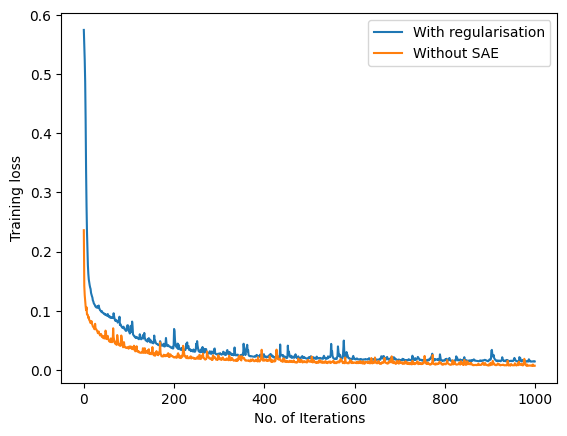

In [ ]:
from tensorflow.keras import regularizers
autoencoder_weights = model.get_weights()[:-2]
nn_model = Sequential()

activation = 'LeakyReLU'

# Add the layers to the deep neural network
for i in range(len(autoencoder_weights)//2):
    nn_model.add(Dense(units=autoencoder_weights[2*i+1].shape[0], activation=activation,kernel_regularizer=regularizers.l2(0.0001), input_dim=autoencoder_weights[2*i].shape[0]))
    nn_model.layers[-1].set_weights(autoencoder_weights[2*i:2*i+2])

# Compile the deep neural network with mean squared error loss and Adam optimizer
nn_model.compile(loss='mse', optimizer='adam', metrics = ['mean_absolute_percentage_error'])
history = nn_model.fit(x_train, y_train, epochs=1000, validation_split=0.2)
plt.plot(history.history['loss'],label= 'With regularisation')
plt.plot(history_dnn_tanh.history['loss'],label= 'Without SAE')
plt.xlabel("No. of Iterations")
plt.ylabel("Training loss")
plt.legend()


loss, accuracy = nn_model.evaluate(x_test, y_test)

print('Test accuracy:', 100 - accuracy)

loss, accuracy = nn_model.evaluate(x_train, y_train)

print('Train accuracy:', 100 - accuracy)

## DNN with PCA

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the number of layers and nodes in each layer
n_layers = 4
n_nodes = [21, 15,10, 5, 3, 1]

# Define the activation function
activation = 'tanh'

# Create the stacked autoencoder model
model = Sequential()

# Add the encoder layers
for i in range(n_layers):
    # Add a dense layer with the specified number of nodes and activation function
    model.add(Dense(units=n_nodes[i+1], activation=activation, input_dim=n_nodes[i]))
    
# Add the decoder layers in reverse order
for i in range(n_layers-1, -1, -1):
    # Add a dense layer with the specified number of nodes and activation function
    model.add(Dense(units=n_nodes[i], activation=activation))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam',metrics = ['mean_absolute_percentage_error'])
# Train the stacked autoencoder on the input data
model.fit(x_train, x_train, epochs=100, batch_size=32)



Epoch 1/100
11/11 [==============================] - 2s 2ms/step - loss: 0.1650 - mean_absolute_percentage_error: 439683.3125
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1306 - mean_absolute_percentage_error: 847429.2500
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1060 - mean_absolute_percentage_error: 1068524.0000
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0847 - mean_absolute_percentage_error: 1306113.1250
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0684 - mean_absolute_percentage_error: 1394519.2500
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0583 - mean_absolute_percentage_error: 1264164.8750
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0533 - mean_absolute_percentage_error: 1054869.6250
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0510 - mean_absolute_percentage_error:

6/6 [==============================] - 0s 3ms/step
(163, 21) (163, 1)


In [ ]:


# Use the trained weights to initialize a deep neural network for prediction
# Remove the last layer since it corresponds to the output of the autoencoder
autoencoder_weights = model.get_weights()[:-2]
nn_model = Sequential()

activation = 'LeakyReLU'

# Add the layers to the deep neural network
for i in range(len(autoencoder_weights)//2):
    nn_model.add(Dense(units=autoencoder_weights[2*i+1].shape[0], activation=activation, input_dim=autoencoder_weights[2*i].shape[0]))
    nn_model.layers[-1].set_weights(autoencoder_weights[2*i:2*i+2])

# Compile the deep neural network with mean squared error loss and Adam optimizer
nn_model.compile(loss='mse', optimizer='adam', metrics = ['mean_absolute_percentage_error'])
history = nn_model.fit(x_train, y_train, epochs=1000, validation_split=0.2)


Epoch 1/1000
9/9 [==============================] - 1s 28ms/step - loss: 0.5924 - mean_absolute_percentage_error: 114.9568 - val_loss: 0.5672 - val_mean_absolute_percentage_error: 113.1635
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5541 - mean_absolute_percentage_error: 106.9211 - val_loss: 0.5399 - val_mean_absolute_percentage_error: 106.7978
Epoch 3/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.5315 - mean_absolute_percentage_error: 102.7625 - val_loss: 0.5258 - val_mean_absolute_percentage_error: 104.3179
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5188 - mean_absolute_percentage_error: 101.1105 - val_loss: 0.5155 - val_mean_absolute_percentage_error: 102.3197
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.5078 - mean_absolute_percentage_error: 99.8624 - val_loss: 0.5051 - val_mean_absolute_percentage_error: 101.3126
Epoch 6/1000
9/9 [==============================] - 0s 9ms/s

In [ ]:

loss, accuracy = nn_model.evaluate(x_test, y_test)

print('Test accuracy:', 100 - accuracy)


6/6 [==============================] - 0s 2ms/step - loss: 0.0907 - mean_absolute_percentage_error: 69.1246
Test accuracy: 30.87542724609375


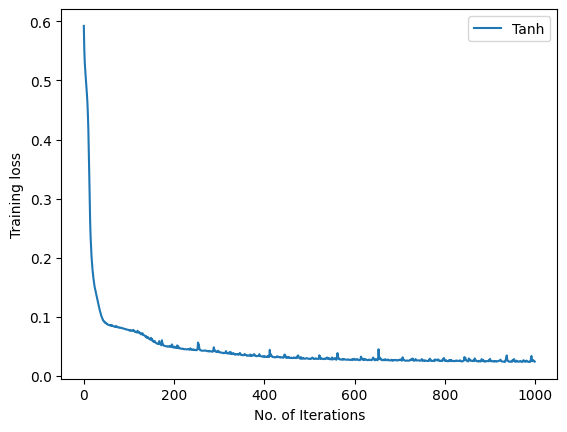

In [ ]:
plt.plot(history.history['loss'],label= 'Tanh')

plt.xlabel("No. of Iterations")
plt.ylabel("Training loss")
plt.legend()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components= 15)
x_red = pca.fit_transform(x_original)

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))

# Normalize the data
x_red = scaler.fit_transform(x_red)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_red, y, test_size=1/3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the number of layers and nodes in each layer
n_layers = 4
n_nodes = [15, 15,10, 5, 3, 1]


# Define the activation function
activation = 'tanh'

# Create the stacked autoencoder model
model = Sequential()

# Add the encoder layers
for i in range(n_layers):
    # Add a dense layer with the specified number of nodes and activation function
    model.add(Dense(units=n_nodes[i+1], activation=activation, input_dim=n_nodes[i]))
    
# Add the decoder layers in reverse order
for i in range(n_layers-1, -1, -1):
    # Add a dense layer with the specified number of nodes and activation function
    model.add(Dense(units=n_nodes[i], activation=activation))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam',metrics = ['mean_absolute_percentage_error'])
# Train the stacked autoencoder on the input data
model.fit(x_train, x_train, epochs=100, batch_size=32)



Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.0515 - mean_absolute_percentage_error: 165.1281
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0438 - mean_absolute_percentage_error: 186.3415
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0384 - mean_absolute_percentage_error: 179.9519
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0346 - mean_absolute_percentage_error: 204.5256
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0317 - mean_absolute_percentage_error: 217.2415
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0297 - mean_absolute_percentage_error: 239.0524
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0283 - mean_absolute_percentage_error: 255.8831
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0272 - mean_absolute_percentage_error: 266.3402
Epoch 9/100
11/1

In [ ]:
autoencoder_weights = model.get_weights()[:-2]
nn_model = Sequential()

activation = 'LeakyReLU'

# Add the layers to the deep neural network
for i in range(len(autoencoder_weights)//2):
    nn_model.add(Dense(units=autoencoder_weights[2*i+1].shape[0], activation=activation, input_dim=autoencoder_weights[2*i].shape[0]))
    nn_model.layers[-1].set_weights(autoencoder_weights[2*i:2*i+2])

# Compile the deep neural network with mean squared error loss and Adam optimizer
nn_model.compile(loss='mse', optimizer='adam', metrics = ['mean_absolute_percentage_error'])
nn_model.fit(x_train, y_train, epochs=1000, validation_split=0.2)


Epoch 1/1000
9/9 [==============================] - 1s 21ms/step - loss: 0.5613 - mean_absolute_percentage_error: 108.6273 - val_loss: 0.5502 - val_mean_absolute_percentage_error: 109.7951
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5443 - mean_absolute_percentage_error: 105.5949 - val_loss: 0.5377 - val_mean_absolute_percentage_error: 107.1574
Epoch 3/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.5317 - mean_absolute_percentage_error: 103.4023 - val_loss: 0.5267 - val_mean_absolute_percentage_error: 104.9535
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5202 - mean_absolute_percentage_error: 101.7668 - val_loss: 0.5170 - val_mean_absolute_percentage_error: 103.3482
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5099 - mean_absolute_percentage_error: 100.4950 - val_loss: 0.5075 - val_mean_absolute_percentage_error: 103.1690
Epoch 6/1000
9/9 [==============================] - 0s 5ms/

In [ ]:

loss, accuracy = nn_model.evaluate(x_test, y_test)

print('Test accuracy:', 100 - accuracy)


6/6 [==============================] - 0s 2ms/step - loss: 0.1201 - mean_absolute_percentage_error: 64.8211
Test accuracy: 35.178863525390625


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components= 10)
x_red = pca.fit_transform(x_original)

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))

# Normalize the data
x_red = scaler.fit_transform(x_red)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_red, y, test_size=1/3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the number of layers and nodes in each layer
n_layers = 4
n_nodes = [10, 10,10, 5, 3, 1]

# Define the activation function
activation = 'tanh'

# Create the stacked autoencoder model
model = Sequential()

# Add the encoder layers
for i in range(n_layers):
    # Add a dense layer with the specified number of nodes and activation function
    model.add(Dense(units=n_nodes[i+1], activation=activation, input_dim=n_nodes[i]))
    
# Add the decoder layers in reverse order
for i in range(n_layers-1, -1, -1):
    # Add a dense layer with the specified number of nodes and activation function
    model.add(Dense(units=n_nodes[i], activation=activation))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam',metrics = ['mean_absolute_percentage_error'])
# Train the stacked autoencoder on the input data
model.fit(x_train, x_train, epochs=100, batch_size=32)



Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.0645 - mean_absolute_percentage_error: 184.4435
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0477 - mean_absolute_percentage_error: 171.9556
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_absolute_percentage_error: 174.6860
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0354 - mean_absolute_percentage_error: 178.0365
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0332 - mean_absolute_percentage_error: 176.5536
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0319 - mean_absolute_percentage_error: 174.3623
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0309 - mean_absolute_percentage_error: 173.0863
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0301 - mean_absolute_percentage_error: 173.0683
Epoch 9/100
11/1

In [ ]:
autoencoder_weights = model.get_weights()[:-2]
nn_model = Sequential()

activation = 'LeakyReLU'

# Add the layers to the deep neural network
for i in range(len(autoencoder_weights)//2):
    nn_model.add(Dense(units=autoencoder_weights[2*i+1].shape[0], activation=activation, input_dim=autoencoder_weights[2*i].shape[0]))
    nn_model.layers[-1].set_weights(autoencoder_weights[2*i:2*i+2])

# Compile the deep neural network with mean squared error loss and Adam optimizer
nn_model.compile(loss='mse', optimizer='adam', metrics = ['mean_absolute_percentage_error'])
nn_model.fit(x_train, y_train, epochs=1000, validation_split=0.2)


Epoch 1/1000
9/9 [==============================] - 1s 23ms/step - loss: 0.5918 - mean_absolute_percentage_error: 115.4653 - val_loss: 0.5670 - val_mean_absolute_percentage_error: 113.0612
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5546 - mean_absolute_percentage_error: 107.1031 - val_loss: 0.5398 - val_mean_absolute_percentage_error: 106.7315
Epoch 3/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.5316 - mean_absolute_percentage_error: 102.8319 - val_loss: 0.5256 - val_mean_absolute_percentage_error: 104.2408
Epoch 4/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.5184 - mean_absolute_percentage_error: 101.1058 - val_loss: 0.5149 - val_mean_absolute_percentage_error: 102.2039
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.5069 - mean_absolute_percentage_error: 99.8315 - val_loss: 0.5048 - val_mean_absolute_percentage_error: 101.3027
Epoch 6/1000
9/9 [==============================] - 0s 4ms/s

In [ ]:

loss, accuracy = nn_model.evaluate(x_test, y_test)

print('Test accuracy:', 100 - accuracy)


6/6 [==============================] - 0s 2ms/step - loss: 0.0908 - mean_absolute_percentage_error: 67.1131
Test accuracy: 32.886940002441406
